# Understanding Neural Network

Created this notebook to manually create a `Neural Network` using `Toy Dataset` and to visualize the internals of the network to understand it better

## Import Libraries

In [46]:
## import the libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons,make_circles,make_blobs
from sklearn.model_selection import StratifiedShuffleSplit
from pathlib import Path

## Creating Toy Dataset

In [4]:
## create the toy dataset
X,y = make_moons(n_samples=1000, noise=0.1,random_state=42)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

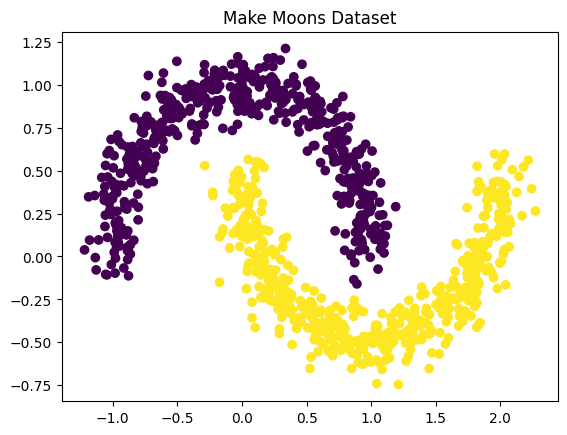

In [6]:
## create a scatter plot 
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.title("Make Moons Dataset")
plt.show()

## Train/Test Split

* Although we might not need it since we just want to visualize the training process, lets still do a train test split just in case. 

In [7]:
## Train Test Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(X,y)):
    train_X = X[train_index,:]
    train_y = y[train_index]
    test_X = X[test_index,:]
    test_y = y[test_index]

In [8]:
## lets print the shapes for verification.
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((800, 2), (800,), (200, 2), (200,))

## Define Neural Network
* So we want to create a NN with 2 layers excluding the input layer,
    * One hidden layer with 3 neurons
    * One output layer.
* We'll use the `tanh` for hidden layer activation function and `sigmoid` function as output layer activation function and will set the predition threshold to 0.5

<img src="../visualizations/nn.png" style="width:600px;height:300px;" />

### Forward Propagation

#### Layer Shapes
* Input layer should have the following shape
    $$ (n_x,m) $$
* Where,
    * $ n_x $ is the number of features, which is 2 in our case.
    * $ m $ is number of instances
* Layer 1 - Hidden Layer (`tanh`) is of size 3 and so will have following shapes,
    * $ W^{[1]} $ : (3,2) - Represents weights for the linear function of each node.
    * $ b^{[1]} $ : (3,1) - Represents the biases for the linear function of each node.
    * $ Z^{[1]} $ : (3,m) - Represents the output of the linear function of each node.
    * $ A^{[1]} $ : (3,m) - Represents the output of the activation function `tanh` of each node.
* Layer 2 - Output Layer (`sigmoid`) will has just one neuron and so will have the following shapes,
    * $ W^{[2]} $ : (1,3) - Represents weights for the linear function of each node.
    * $ b^{[2]} $ : (1,1) - Represents the biases for the linear function of each node.
    * $ Z^{[2]} $ : (1,m) - Represents the output of the linear function of each node.
    * $ A^{[2]} $ : (1,m) - Represents the output of the activation function `sigmoid` of each node.

#### Calculation
##### Layer 1
* Math behind linear and non linear calculation of each neuron
$\\ Z^{[1]} = W^{[1]} * X + b^{[1]} \\$
$ A^{[1]} = tanh(Z^{[1]}) $
* Programming behind linear and non linear calculation of each neuron
    * We can you `np.dot` or `np.matmul` to calculate the product of weights and input features.
    * We can use the `+` operator to calculate the sum between `WX` and `b`
    * We can use `np.tanh` to calculate the activation function.
##### Layer 2
* Math behind linear and non linear calculation of each neuron
$\\ Z^{[2]} = W^{[2]} * A^{[1]}  + b^{[2]} \\$
$ A^{[1]} = \sigma(Z^{[2]}) $
* Programming behind linear and non linear calculation of each neuron
    * We can you `np.dot` or `np.matmul` to calculate the product of weights and input features.
    * We can use the `+` operator to calculate the sum between `WX` and `b`
    * We can use the `np.exp` to calculate $ e^{-x} $ and following formula to calculate the sigmoid
    $$ 
        \sigma(x) = {1 \over {1 + e^{-x}}}
    $$

### Back Propagation

* For back propagation we need to calculate gradients of the cost function with respect to all the parameters (W,b)
* We'll go layer by layer starting from the output layer all the way to the first layer. 

#### Cost Function
* So the cost can be calculated using the following formula
$$
    J = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{a}^{[2](i)}) + (1 - y^{(i)}) \log(1 - \hat{a}^{[2](i)}) \right]
$$
* We can calculate this in `numpy` as follows
```python
    logs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = -(1/m)*np.sum(logs)
```
#### Back Propagation Calculation

* First step is to calculate $ dA^{[2]} $ which is the derivative of the cost function w.r.t. $ dA^{[2]} $. The Below formula represents the calculation of the derivative
$$
  dA^{[2]} = -{Y \over A^{[2]}} + {{1 - Y} \over {1 - A^{[2]}}}  
$$
* In python,
```python
    dA2 = -(Y / A2) + ((1 - Y) / (1 - A2))
```
---
* Next step is to calculate $ dZ^{[2]} $ which is derivative of cost function w.r.t. $ dZ^{[2]} $. The formula below represents the calculation of the derivative using the chain rule,
$$
  dZ^{[2]}=A^{[2]}−Y
$$
* In python,
```python
    dZ2 = A2 - Y
```
---
* Next we calculate $ dW^{[2]} $  which is derivative of cost function w.r.t. $ dW^{[2]} $. Using chain rule we get,
$$
dW^{[2]}={1 \over m}dZ^{[2]}(A^{[1]})^T
$$
* In python,
```python
    dW2 = (1/m)*np.dot(dZ2,(A1.T))
```
---
* Next is $ db^{[2]} $ which is derivative of the cost function w.r.t. $ db^{[2]} $. Using chain rule we get,
$$
  db^{[2]}={1 \over m}\sum {dZ^{[2]}}
$$
* In python,
```python
    db2 = (1/m) * np.sum(dZ2, axis=1,keepdims = True)
```
---
* Next is $ dA^{[1]} $, i.e. derivative of cost function w.r.t $ dA^{[1]} $,
$$
  dA^{[1]}=(W^{[2]})^TdZ^{[2]}
$$
* In python,
```python
    dA1 = np.dot(W2.T,dZ2)    
```
---
* Next we find out $ dZ^{[1]} $, i.e. derivative of cost function w.r.t.  $ dZ^{[1]} $,
$$
  dZ^{[1]}=dA{[1]} ∘ g^{\prime}(Z^{[1]})
$$
* In above function $ g^{\prime}(Z^{[1]}) $ is the derivation of the cost function of layer 1, which is derivation of `tanh` function, which can be calculated as below,
$$
    tanh^{\prime}(z) = 1 - tanh^2(z)
$$
* In python,
```python
    dZ1 = dA1 * (1 - np.power(A1, 2))
```
---
* Next is $ dW^{[1]} $, which can be calculated as follow,
$$
    dW^{[1]}={1\over m}dZ^{[1]}X^T
$$
* In python,
```python
    dW1 = (1/m) * np.dot(dZ1,X.T)
```
---
* Finally we find out $ db^{[1]} $ as follows,
$$
    db^{[1]}={1 \over m}\sum{dZ^{[1]}}
$$
* In python,
```python
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
```
#### Updating Parameters
* We then use dW1, db1, dW2, db2 to update the parameters of respective layers as follows,
$$
    W = W - \alpha{dW} \\
    b = b - \alpha{db}
$$
* In the above equation $ \alpha $ is the learning rate.
* In Python,
```python
    W = W - learning_rate * dW
    b = b - learning_rate * db
```

## Implement Neural Network
* In this section we'll implement the above defined neural network
* Lets break down the implementation into multiple functions for reusability
* We'll create the following reusable functions,
    * A function to initialize the data structures
    * A function to initialize parameters (weights & biases)
    * A function for forward propagation
    * A function to calcualte loss
    * A function for backward propagation
    * A function to update the params
    * A wrapper function that uses the above functions.

In [9]:
## helper function to initialize W1,b1,W2,b2 based on training dataset.
## the function assumes a fixed NN with 2 layers - hidden layer with 3 neurons, output layer with 1 neuron.
def initialize_parameters(n_x,n_1,n_2):
    W1 = np.random.randn(n_1,n_x)*0.01
    b1 = np.zeros((n_1,1))
    W2 = np.random.randn(n_2,n_1)*0.01
    b2 = np.zeros((n_2,1))

    ## TODO read the shape of X and initialize parameters
    return {
        "W1":W1,
        "b1":b1,
        "W2":W2, 
        "b2":b2,
    }

In [10]:
# helper function to implement forward propagation
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # calculate Z1
    Z1 = np.dot(W1, X) + b1

    # calcualte A1 using tanh
    A1 = np.tanh(Z1)

    # calculate Z2
    Z2 = np.dot(W2, A1) + b2

    # calculate A2 using sigmoid
    A2 = 1 / (1 + np.exp(-Z2))

    # return forward propagation calculation
    return {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
    }

In [11]:
# helper function to calculate back propagation based on forward prop values and derivatives
def back_propagation(X, y, forward_prop, parameters):
    ## read m from input features which should have shape of (n_x, m)
    m = X.shape[1]
    ## read values from forward prop
    Z1 = forward_prop["Z1"]
    A1 = forward_prop["A1"]
    Z2 = forward_prop["Z2"]
    A2 = forward_prop["A2"]
    
    ## read parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # calculate dA2
    dA2 = -(y / A2) + ((1 - y) / (1 - A2))
    
    ## calculate dZ2
    dZ2 = A2 - y
    
    ## calculate dW2
    dW2 = (1/m)*np.dot(dZ2,(A1.T))
    
    ## calculate db2
    db2 = (1/m) * np.sum(dZ2, axis=1,keepdims = True)
    
    ## calculate dA1
    dA1 = np.dot(W2.T,dZ2)    

    ## calculate dZ1
    dZ1 = dA1 * (1 - np.power(A1, 2))

    ## calculate dw1
    dW1 = (1/m) * np.dot(dZ1,X.T)

    ## calculate db1
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    return {
        "dA2":dA2,
        "dZ2":dZ2,
        "dW2":dW2,
        "db2":db2,
        "dA1":dA1,
        "dZ1":dZ1,
        "dW1":dW1,
        "db1":db1        
    }

In [12]:
## helper function to update the params based on gradients calculated during back propogation
def update_params(parameters, gradients, learning_rate = 0.01):
    ## read parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    ## read gradient values
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    ## update the params
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return {
        "W1":W1,
        "b1":b1,
        "W2":W2, 
        "b2":b2,
    }

In [13]:
## helper function to calculate cost for the predictions
def compute_cost(A2, y):
    m = y.shape[1]
    cost = -(1/m) * (np.dot(np.log(A2),y.T) + np.dot(np.log(1 - A2),1 - y.T))
    return cost

In [14]:
## predict using parameters
def predict(X,parameters):
    ##TODO Return predictions
    forward_prop = forward_propagation(X, parameters=parameters)
    A2 = forward_prop["A2"]
    predictions = A2 > 0.5
    return predictions

In [15]:
def plot_hidden_boundaries(X, y, parameters, iteration):
    plt.figure(figsize=(8, 6)) # Create a new figure each time

    # Get current parameters
    W1 = parameters["W1"] 
    b1 = parameters["b1"]
    W2 = parameters["W2"] 
    b2 = parameters["b2"]

    # Plot the original data points
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral, edgecolors='k')

    # Determine plot limits
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Plot the line for each hidden neuron
    # Number of hidden neurons
    n_h = W1.shape[0]

    for i in range(n_h):
        # Extract weights w1, w2 and bias b for neuron i
        w1 = W1[i, 0]
        w2 = W1[i, 1]
        b = b1[i, 0]

        # Equation of the line: w1*x1 + w2*x2 + b = 0
        # We need two points to plot a line. Let's find y for x_min and x_max
        # Rearranged: x2 = (-w1*x1 - b) / w2

        # Create x values spanning the plot width
        x1_vals = np.array([x_min, x_max])

        # Calculate corresponding x2 values
        # **Important Check:** Avoid division by zero if w2 is very small!
        if abs(w2) > 1e-6: # If w2 is not close to zero (line is not vertical)
            x2_vals = (-w1 * x1_vals - b) / w2
            # Plot the line using the calculated points
            plt.plot(x1_vals, x2_vals, label=f'Neuron {i+1} Line', linestyle='--')
        else: # If w2 is close to zero, the line is vertical
            # Equation becomes: w1*x1 + b = 0  => x1 = -b / w1
            x1_val = -b / w1
            # Plot a vertical line using plt.axvline
            plt.axvline(x=x1_val, label=f'Neuron {i+1} Line (Vertical)', linestyle=':', color=plt.cm.viridis(i/n_h)) # Example styling

    ## Plot the decision boundry
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_X = np.c_[xx.ravel(), yy.ravel()].T
    A2_grid = predict( grid_X, parameters) # Shape (1, num_grid_points)
    grid_Z = A2_grid.astype(int)
    grid_Z = grid_Z.reshape(xx.shape)
    plt.contour(xx, yy, grid_Z,  alpha=0.8, colors='black', linewidths=2, label="Decision Boundary")
    # Plot empty data [],[] but specify color, linewidth, and the desired label
    ## this is to add the decision boundary to plot legend
    plt.plot([], [], color='black', linewidth=2, label='Decision Boundary')
    
    plt.title(f"Hidden Neuron Linear Boundaries at Iteration {iteration}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    # plt.show()
    plt.savefig(str(Path("..","nn_visualizations","training",f"hidden_boundaries_iter_{iteration}.png"))) # Save for animation later
    plt.close() # Close figure if saving to avoid displaying too many

In [16]:
## helper funtion to train a NN using the arguments
def train_nn(X,y, num_iterations = 10000, learning_rate = 0.01):
    n_x = X.shape[0] # number of input features
    n_1 = 3 # number of nodes in first layer
    n_2 = 1 # number of notes in second layer
    ## initialize random params
    parameters = initialize_parameters(n_x,n_1,n_2)
    plot_every = 500 # Plot every 500 iterations
    costs = [] # Keep track of costs for plotting later
    
    for iter in range(num_iterations):        
        forward_prop = forward_propagation(X, parameters)
        A2 = forward_prop["A2"]
        cost = compute_cost(A2, y)
        costs.append(cost)
        gradients = back_propagation(X, y, forward_prop, parameters)
        parameters = update_params(parameters, gradients, learning_rate = 0.1)
        
        ## save the plot for visualization
        if( iter % plot_every == 0):
            plot_hidden_boundaries(X,y,parameters=parameters,iteration=iter)
        print(f"cost after iteration : {iter} is {cost}")
    
    print(f"Final Params : {parameters}")
    return parameters

In [17]:
## lets start with the features and the target variable. 

## reshape train_y to be row vector for consistency. 
train_y = train_y.reshape(-1,1)

# transpose the dataset to match deep learning convention. 
train_X_T = train_X.T
train_y_T = train_y.T
train_X_T.shape, train_y_T.shape

((2, 800), (1, 800))

In [18]:
final_parameters = train_nn(X=train_X_T,y=train_y_T, num_iterations=20000, learning_rate=0.1)

/var/folders/cr/_sybcrvs2vsc1dxpm0cwh0nh0000gn/T/ipykernel_16204/2969912220.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, grid_Z,  alpha=0.8, colors='black', linewidths=2, label="Decision Boundary")


cost after iteration : 0 is [[0.69314329]]
cost after iteration : 1 is [[0.69313684]]
cost after iteration : 2 is [[0.69313036]]
cost after iteration : 3 is [[0.69312383]]
cost after iteration : 4 is [[0.69311722]]
cost after iteration : 5 is [[0.6931105]]
cost after iteration : 6 is [[0.69310366]]
cost after iteration : 7 is [[0.69309666]]
cost after iteration : 8 is [[0.69308948]]
cost after iteration : 9 is [[0.69308209]]
cost after iteration : 10 is [[0.69307447]]
cost after iteration : 11 is [[0.69306658]]
cost after iteration : 12 is [[0.69305839]]
cost after iteration : 13 is [[0.69304987]]
cost after iteration : 14 is [[0.69304099]]
cost after iteration : 15 is [[0.69303172]]
cost after iteration : 16 is [[0.69302202]]
cost after iteration : 17 is [[0.69301186]]
cost after iteration : 18 is [[0.69300119]]
cost after iteration : 19 is [[0.69298997]]
cost after iteration : 20 is [[0.69297817]]
cost after iteration : 21 is [[0.69296575]]
cost after iteration : 22 is [[0.69295264]]

In [19]:
print(final_parameters)

{'W1': array([[ 3.24672399, -2.26507175],
       [ 2.70301473, -2.3086611 ],
       [ 3.72186791,  2.51640286]]), 'b1': array([[ 2.09281399],
       [-3.42485804],
       [-2.31029694]]), 'W2': array([[ 5.86958477,  6.0517674 , -5.80910966]]), 'b2': array([[0.22772399]])}


## Animating Hidden Boundries

In [20]:
import imageio.v3 as iio
from os import listdir

In [33]:
import re

def extract_iteration_number(filename):
  """Extracts the integer iteration number from filenames like '..._iter_NUMBER.png'."""
  # Use regular expression to find digits between '_iter_' and '.png'
  match = re.search(r'_iter_(\d+)\.png$', filename)
  if match:
    return int(match.group(1)) # Convert the found digits (group 1) to an integer
  else:
    return -1 # Return a default value if pattern doesn't match


def create_gif(image_dir,output_file_name = "output.gif", duration=1000):
    ## get list of images from image dir
    image_list = listdir(image_dir)
    ## only keep .png images
    image_list = filter(lambda filename: str(filename).endswith(".png"), image_list)
    ## sort them to make sure the animation runs in correct order
    image_list = sorted(image_list, key=extract_iteration_number)
    ## append complete path to the file names
    full_path_image_list = [f"{str(image_dir)}/{filename}" for filename in image_list]
    images = []
    for filenames in full_path_image_list:
        images.append(iio.imread(filenames))
    iio.imwrite(f'{image_dir}/{output_file_name}', images, duration = duration, loop = 0)        


In [22]:
image_dir = Path("..","nn_visualizations","training")
create_gif(image_dir=image_dir)

## Animating Activation 

* Lets try and see if we can visualize neurons activating during predictions, we'll use the test set for that.

In [23]:
## lets run our NN against the test set and check the predictions
## first trasponse it to match the convention. 
test_X_T = test_X.T
test_y = test_y.reshape(-1,1)
test_y_T = test_y.T

test_X_T.shape,test_y_T.shape

((2, 200), (1, 200))

In [24]:
test_output = forward_propagation(test_X_T,final_parameters)
test_pred = test_output["A2"]>0.5
test_pred_classes = test_pred.astype("int")

In [25]:
from sklearn.metrics import accuracy_score,f1_score

accuracy = accuracy_score(test_y_T,test_pred_classes)
f1 = f1_score(test_y_T, test_pred_classes,average="micro")


print(f"Accuracy :{accuracy}")
print(f"F1 :{f1}")

Accuracy :1.0
F1 :1.0


* All thought impressive, these scores are easy to reproduce in a toy dataset with minimum noise. 
* Real world data should be more complex, with overlapping class boundaries. 

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def plot_activation_frame(X, y, X_test, y_test, A1_test, parameters, iteration):
    plt.figure(figsize=(8, 6))  # Create a new figure each time

    # Get current parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Plot the original data points
    plt.scatter(X[0, :], X[1, :], c=y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k')
    
    plt.scatter(X_test[0, 0], X_test[1, 0],
                c='yellow',        # Set color to yellow
                s=150,             # Make the size larger (e.g., 150)
                marker='*',        # Use a star marker (optional)
                edgecolors='black', # Add a black edge for visibility
                zorder=3,          # Ensure it's plotted on top of most other elements
                label='_nolegend_') # Use '_nolegend_' if you don't want it in the legend

    # Determine plot limits
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Plot the line for each hidden neuron
    # Number of hidden neurons
    n_h = W1.shape[0]

    for i in range(n_h):
        # Extract weights w1, w2 and bias b for neuron i
        w1 = W1[i, 0]
        w2 = W1[i, 1]
        b = b1[i, 0]
        A1 = A1_test[i,0]
        ## map the activation to line style so that it reflects how the neuron is contributing to output

        line_strength = abs(A1)
        linewidth = 1 + line_strength * 3
        alpha = 0.1 + line_strength * 0.9
        if A1 > 0:
            line_color = 'lime'  # Or 'green', 'cyan' - pick a bright positive color
        else:
            line_color = 'red'   # Or 'magenta' - pick a bright negative color
        

        # Equation of the line: w1*x1 + w2*x2 + b = 0
        # We need two points to plot a line. Let's find y for x_min and x_max
        # Rearranged: x2 = (-w1*x1 - b) / w2

        # Create x values spanning the plot width
        x1_vals = np.array([x_min, x_max])

        # Calculate corresponding x2 values
        # **Important Check:** Avoid division by zero if w2 is very small!
        if abs(w2) > 1e-6:  # If w2 is not close to zero (line is not vertical)
            x2_vals = (-w1 * x1_vals - b) / w2
            # Plot the line using the calculated points
            plt.plot(x1_vals, x2_vals,
                     label=f'Neuron {i+1} Line', linestyle='--', linewidth=linewidth,alpha=alpha, color=line_color)
        else:  # If w2 is close to zero, the line is vertical
            # Equation becomes: w1*x1 + b = 0  => x1 = -b / w1
            x1_val = -b / w1
            # Plot a vertical line using plt.axvline
            plt.axvline(x=x1_val, label=f'Neuron {i+1} Line (Vertical)',linestyle=':', color=plt.cm.viridis(i/n_h))


    plt.title(f"Input {X_test.flatten()} \n True value {np.squeeze(y_test)}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    # plt.show()


    plt.savefig(str(Path("..", "nn_visualizations", "activation",f"neuron_activations_iter_{iteration}.png")))
    plt.close()  # Close figure if saving to avoid displaying too many

In [42]:
for i in range(test_X.shape[0]):
    ## read test_X
    test_features = test_X[i,:]
    test_features = test_features.reshape(-1,1)
    
    true_value =test_y[i,:]
    true_value = true_value.reshape(-1,1)
    
    test_output = forward_propagation(test_features,final_parameters)
    test_pred = test_output["A2"]>0.5
    test_pred_classes = test_pred.astype("int")
    prediction = np.squeeze(test_pred_classes)
    print(f"True value :{np.squeeze(true_value)}, prediction : {prediction}")
    print(f"A1:{test_output["A1"]}")
    plot_activation_frame(X.T,y.T,test_features, true_value,test_output["A1"],final_parameters,i)
    
    

True value :1, prediction : 1
A1:[[ 0.96676118]
 [-0.99834655]
 [-0.88620194]]
True value :0, prediction : 0
A1:[[-0.96213003]
 [-0.99999875]
 [-0.99464856]]
True value :0, prediction : 0
A1:[[-0.94785954]
 [-0.99999845]
 [-0.98418461]]
True value :0, prediction : 0
A1:[[-0.6329234 ]
 [-0.99999177]
 [-0.52472311]]
True value :1, prediction : 1
A1:[[ 0.99975303]
 [-0.85904872]
 [-0.81436495]]
True value :1, prediction : 1
A1:[[ 0.98336531]
 [-0.99678756]
 [-0.90440195]]
True value :1, prediction : 1
A1:[[0.99999979]
 [0.88433694]
 [0.99999036]]
True value :1, prediction : 1
A1:[[ 0.99830081]
 [-0.97321789]
 [-0.91483893]]
True value :0, prediction : 0
A1:[[ 0.98008715]
 [-0.99844449]
 [ 0.95409031]]
True value :0, prediction : 0
A1:[[-0.82190622]
 [-0.99999264]
 [-0.99978753]]
True value :1, prediction : 1
A1:[[0.99999952]
 [0.81750105]
 [0.99971518]]
True value :1, prediction : 1
A1:[[0.9999998 ]
 [0.92743271]
 [0.99790522]]
True value :1, prediction : 1
A1:[[ 0.99995135]
 [-0.5052945 

In [43]:
image_dir = Path("..","nn_visualizations","activation")
create_gif(image_dir=image_dir, output_file_name="activations.gif", duration=3000)